In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#Uploading the dataset 
Dataset = r"C:\Users\princ\OneDrive\Documents\Chapter 1\Python\Machine Learning\ML Data\winequality-red.csv"
df = pd.read_csv(r"C:\Users\princ\OneDrive\Documents\Chapter 1\Python\Machine Learning\ML Data\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Checking the correlation between the data

In [6]:
df.shape

(1599, 12)

In [7]:
correlation = df.corr()

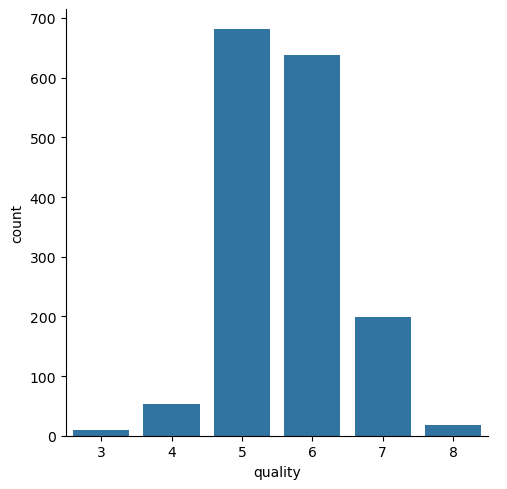

In [8]:
sns.catplot(x='quality',data=df,kind='count')

<Axes: >

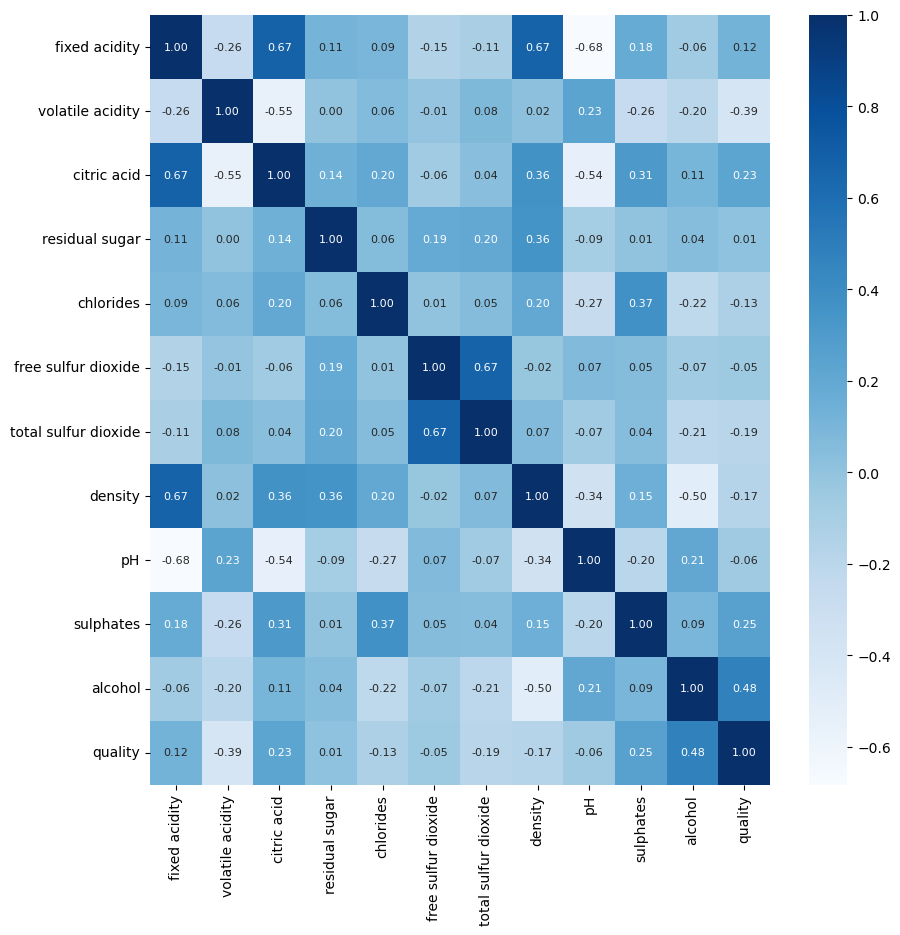

In [9]:
#Constructing a heatmap to understand the correlation between the columns\
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cbar = True , fmt= '.2f',annot = True, annot_kws = {"size":8},cmap = "Blues")


Data Preprocessing 

In [10]:
#Seprating the data and label
X= df.drop(['pH', 'free sulfur dioxide','residual sugar','quality'],axis = 1)
y = df['quality']


Label Binarization

In [11]:
y = df['quality'].apply(lambda y_value:1 if y_value>=7 else  0)

splitting the data into train and test data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

Model Training:Random Forest Classifier 

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(X_train,y_train)

RandomForestClassifier()

ModelEvaluation

In [15]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,y_test)
print("Accuracy score of the model on Testing Data is:",test_data_accuracy)

Accuracy score of the model on Testing Data is: 0.925


Building a Predictive System

In [17]:
input_data = (7.5,0.5,0.36,0.071,102.0,0.9978,0.8,10.5)
# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# Reshaping the data to have 1 row and 8 columns (8 features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # Changed from (-1, 1) to (1, -1)
Prediction = model.predict(input_data_reshaped)
print(Prediction)
if Prediction[0] == 0:  # Added [0] to access the first element of the prediction array
    print("Wine Quality is not good")
else:
    print("Wine quality is good")

[0]
Wine Quality is not good


C:\Users\princ\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
